*Supporting textbook chapters for week 7: Chapters 8.4, 8.2, 8.5.5, 8.6*

Lecture 7, topics:
* Adaptive step size for RK schemes,
* Bulirsch-Stoer method,
* Boundary value problems,
* Stability issues.

Last week: ODE(s) with some initial condition(s):
* 1D: $\quad\displaystyle \ode{x}{t} = f(x, t)\quad \text{with}\quad x(t=0)=x_0.$
* $n$D: $\quad\displaystyle \ode{x_i}{t} = f_i(x_1,\dots{},x_n, t)\quad \text{with}\quad x_i(t=0)=x_{i0}.$
* higher order, e.g.: 
$$\oden3{x}{t} =f(x, t)\quad \Leftrightarrow \quad \ode{x}{t} = v,\ \ode{v}{t} = a,\ \ode{a}{t}=f.$$

**RK2:**

* $\oplus$ Easily(sh) extended to RK4
* $\oplus$ Possible to use adaptive time step (this week)
* $\ominus$ time-reversible
* $\ominus$ accuracy

**RK4:**

* $\oplus$ accuracy
* $\oplus$ Possible to use adaptive time step (this week)
* $\ominus$ time-reversible

**Leapfrog:**

* $\oplus$ time-reversible
* $\oplus$ basis for higher-order methods (Bulirsch-Stoer, this week)
* $\ominus$ accuracy
* $\ominus$ time step has to be constant (not exactly true, as we will see).

## Error of RK4

* Very accurate method: error is $\epsilon = ch^5$ at each time step $h$, $c$ constant (order $h^4$ globally).
* Error after 2 time steps: $\approx 2ch^5$.
* Error after 1 time step of $2h$:$~ \approx c(2h)^5 = 32 ch^5 \gg 2 ch^5$
* The difference is $(32-2)ch^5=30 ch^5 = 30\epsilon$.
* To estimate error: run ODE solver twice with $h$ (to get $x_1$), once with $2h$ (to get $x_2$), divide difference by 30.
$$\epsilon = ch^5 = \frac{1}{30}(x_1 - x_2).$$

![Newman fig. 8.7](fig8-7.png)

## Adaptive time stepping

* Suppose target error is $\delta$ *per unit time* (physical time, not step). 
* If
$$\rho = \frac{h\delta}{\epsilon} = \frac{30h\delta}{|x_1 - x_2|} = \frac{30 \delta}{ch^4} > 1,$$
then $h$ is too small (as in, could be bigger, saving computational resources while still reaching target accuracy) and can be adjusted to $h' = h\rho^{1/4}$ to get $\rho'=1$.
    * Still achieves target error, which is $h' \delta$ for step of size $h'$.
    * Saves calculation time.

* If $\rho < 1$, the time step is too large and needs to be adjusted down by the same factor.
    * We also need to repeat our calculation to get the desired accuracy.
    * This will guarantee meeting error target.
* We test if we need to adjust by performing the calculation twice (we retrieve $x_1$ and $x_2$), testing if we met the target, and adjusting $h$.
* Overall, despite extra work (up to 3 RK4 steps per time step), program often faster because resolution focused where it's needed.

![Newman 8.6](fig8-6.png)

# From Leapfrog to Bulirsch-Stoer

![Newman's fig. 8.9, focus on leapfrog](Leapfrog.png)

## Leapfrog error

* Leapfrog is timestep-reversible.
* $\Rightarrow$ error $\epsilon$ is an **odd** function of $h$:
$$\epsilon(-h) = -\epsilon(h)$$
$\Rightarrow$ Taylor expansion is made of **odd** powers of $h$,
    $$\epsilon(h)  = c_3 h^3 + c_5 h^5 + \dots$$
* $\Rightarrow$ cumulative error is **even** in $h$.
* Each improvement we apply $\Rightarrow$ we can get two orders of accuracy, if we play it right.
* But first, we have to eliminate all even powers in $\epsilon$ due to first 1/2 step.

## Modified mid-point (MMP) method

How to eliminate even powers of $\epsilon$ during the first 1/2 step?
* Integration from $t$ to $t+H$, with $n+1$ time steps:
\begin{align*}
x_0 & = x(t) \\
x_{1/2} & = x_0 + hf(x_0, t)/2\quad \text{(Initial Euler 1/2-step $\Rightarrow$ lots of even powers in $\epsilon$!)}\\
x_1 & = x_0 + hf(x_{1/2}, t + h/2) \\
x_{3/2} & = x_{1/2} + hf(x_1, t+h) \\
        & \vdots
\end{align*}
* ... and keep going until you reach the end.
* So far, this is identical to Leapfrog.

* Then, do **both** the whole integer **and** the forward Euler 1/2-step.
    \begin{align*}
    x_{n-1/2} & = x_{n-3/2} + hf(x_{n-1}, t + H - h),\\
    x_{n} & = x_{n-1} + hf(x_{n-1/2}, t+H-h/2)\approx x(t+H) \\
    x_n ' & = x_{n-1/2} + hf(x_n, t+H)\approx x(t+H)
    \end{align*}
    
* Now do the following adjustment:
    $$x(t+H)_{final} = \frac{x_n + x_n'}2$$ 
    ... and you have canceled the even powers (MMP method).

This is not a trivial result (cf. Gragg 1965 for proof; https://doi.org/10.1137/0702030 PDF posted on Quercus if you're curious).

## Bulirsch-Stoer method

MMP method rarely used by itself, but is the basis for the powerful Bulirsch-Stoer method:
 * Take 1 single MMP step of size $h_1 = H$ to get estimate of $$x(t+H) = R_{1, 1}.$$ ($R$ stands for "Richardson extrapolation")
 * Now take 2 MMP steps of size $h_2 = H/2$ to get second estimate of $$x(t+H) = R_{2,1}.$$

* Since we know the MMP has 2nd order and even total error, we can write both of these estimates as
\begin{align*}
x(t+H) & = R_{1,1} + c_1 h_1^2 + O(h_1^4)\quad \text{and}\\
x(t+H) & = R_{2,1} + c_1 h_2^2 + O(h_2^4).
\end{align*}

* Using the relationship between the step sizes: $h_1 = 2 h_2$, we can equate these expressions to get
$$R_{1,1} + 4 c_1 h_2^2 + O(h_2^4) = R_{2,1} + c_1 h_2^2 + O(h_2^4)$$
$$\Rightarrow\ c_1 h_2^2 = \frac{1}{3}(R_{2,1} - R_{1,1}) + O(h_2^4).$$
* If we plug this back in to the expression for $x(t+H)$ above we get a new estimate called $R_{2,2}$:
    $$x(t+H) \approx R_{2,2}  + \boxed{O(h^4_2)}$$

$$x(t+H) = \underbrace{R_{2,1} + \frac{1}{3}(R_{2,1} - R_{1,1})}_{R_{2,2}} + \boxed{O(h^4_2)}.$$
* 2 different grid spacings ($H$ and $H/2$) $\to$ expression for the leading error term $\to$ replace it with our estimates for these grid spacings, i.e., $R_{1,1}$ and $R_{2,1}$.
* We have reduced the error in our estimate by 2 orders! *(which was possible because the errors were even)*

**Why stop there?**

* Take another grid spacing, to estimate the **new** leading order error term and then replace by that.
* E.g., with $h_3=H/3$, MMP method yields $$x(t+H) = R_{3,1} + c_1 h_3^2 + O(h_3^4).$$

* E.g., with $h_3=H/3$, compare with estimate with $h_2 = H/2 =  3h_3/2$: 
\begin{align*}
x(t+H) & = R_{3,1} + c_1 h_3^2 + O(h_3^4),\\
       & = R_{2,1} + c_1\left(\frac32 h_3\right)^2 + O(h_3^4),\\
\Rightarrow\ & R_{3,1} + c_1 h_3^2 + O(h_3^4) = R_{2,1} + c_1\frac94 h_3^2 + O(h_3^4)\\
\Rightarrow\ & c_1 h_3^2 = \frac45 (R_{3,1} - R_{2,1}) + O(h_3^4)
\end{align*}
* Now plugging this into our expression for $x(t+H)$ and calling it $R_{3,2}$,
$$x(t+H) \approx R_{3,2} + c_2 h_3^4 +  \boxed{O(h_3^6)},$$
$$\text{where}\ R_{3,2} = R_{3,1} + \frac45 (R_{3,1} - R_{2,1}), $$

* Equating $R_{3,2}$ and $R_{2,2}$ allows to find $c_2$:
\begin{align*}
    x(t+H) & \approx R_{2,2} + c_2 h^4_2 + \boxed{O(h^6_2)} \\
           & \approx R_{3,2} + c_2 h_3^4 + \boxed{O(h_3^6)}\\
h_3 = 2 h_2/3 & \Rightarrow c_2 h_3^4 = \frac{16}{65}(R_{3,2} - R_{2,2})
\end{align*}

* Plugging this back in and calling the new result $R_{3,3}$ yields
$$x(t+H) \approx R_{3,3} + O(h_3^6),$$
$$\text{where}\ R_{3,3} = R_{3,2} + \frac{16}{65}(R_{3,2} - R_{2,2}),$$

* and so on.

* The power in this method is that you keep cancelling 2 powers in the error for every new grid spacing you consider.
* Can continue the refinement until you reach the error tolerance you want.
* Summary of method:
    * Take $h=H$, set $n=1$ and use MMP to find $x(t+H)$,
    * Continue to refine grid to find new estimates and error estimates.
    * When error is acceptable, stop.

* The iteration can be expressed:
$$ x(t+H) = R_{n, m+1} + O(h_n^{2m+2}),\qquad\text{where}$$
$$ R_{n, m+1} = R_{n,m} + \frac{R_{n,m} - R_{n-1, m}}{[n/(n-1)]^{2m} - 1}\quad \text{and}\quad h_n = \left(\frac{n-1}{n}\right)h_{n-1}. $$

Look at `bulirsch.py` from textbook. for solving nonlinear pendulum,
$$\ode{\theta}{t} = \omega, \qquad \ode{\omega}{t} = -\frac{g}{\ell}\sin\theta.$$

Extrapolation table:
\begin{align*}
n = 1:\ & R_{1,1}\hspace{-20pt} & & & & & & \\
       & & \searrow & & & & & \\
n = 2:\ & R_{2,1}\hspace{-20pt} & \to & R_{2,2}\hspace{-20pt} & & & & \\
       & & \searrow & & \searrow & & & \\
n = 3:\ & R_{3,1}\hspace{-20pt} & \to & R_{3,2}\hspace{-20pt} & \to & R_{3,3}\hspace{-20pt} & & \\
       & & \searrow & & \searrow & & \searrow & \\
n = 4:\ & \underbrace{R_{4,1}}_{MMP}\hspace{-20pt} & \to & R_{4,2}\hspace{-20pt} & \to & R_{4,3}\hspace{-20pt} & \to & R_{4,4}\hspace{-20pt}
\end{align*}

In [8]:
# adapted from bulirsch.py from Newman 
from math import sin, pi
from numpy import empty, array, arange
from pylab import plot, show, xlabel, ylabel, figure, grid

g = 9.81
ell = 0.1
theta0 = 179*pi/180
a = 0.0
b = 10.0
N = 100  # Number of "big steps"
H = (b-a)/N  # Size of "big steps"
delta = 1e-8  # Required position accuracy per unit time

def f(r):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/ell)*sin(theta)
    return array([ftheta, fomega], float)


tpoints = arange(a, b, H)
thetapoints = []
r = array([theta0, 0.0], float)

In [9]:
for t in tpoints: # Do the "big steps" of size H
    thetapoints.append(r[0])
    n = 1     # Do one modified midpoint step to get things started
    r1 = r + 0.5*H*f(r)
    r2 = r + H*f(r1)
    # array R1: row1 of extrapolation table, which contains the single MMP estimate for end of interval
    R1 = empty([1, 2], float)
    R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2))
    error = 2*H*delta # Now increase n until the required accuracy is reached
    while error > H*delta:
        n += 1
        h = H/n
        r1 = r + 0.5*h*f(r) # MMP
        r2 = r + h*f(r1)
        for i in range(n-1):
            r1 += h*f(r2)
            r2 += h*f(r1)
        R2 = R1*1 # Extrapolation estimates: Arrays R1, R2 hold the two most recent lines of the table
        R1 = empty([n, 2], float)
        R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2))
        for m in range(1, n):
            epsilon = (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1)
            R1[m] = R1[m-1] + epsilon
        error = abs(epsilon[0])  # epsilon[0] is theta error
    r = R1[n-1] # Set r to our most accurate estimate, before giong to next big step

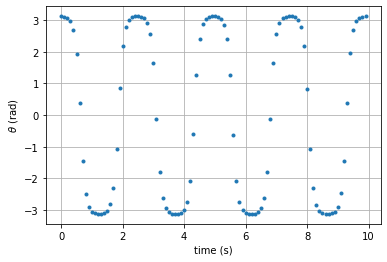

In [12]:
# Plot the results
# plot(tpoints, thetapoints)
plot(tpoints, thetapoints, ".")
xlabel('time (s)')
ylabel(r'$\theta$ (rad)')
grid()
show()

* Notes: This only calculates really accurate values for $x(t+H),$ not the region in between.
* Common practice (helps with efficiency/speed):
    * If your solution doesn't reach your tolerance level in some `nmax` steps (usually `nmax` $\sim 8-10$), half your interval and redo in smaller $H$ regions.
    * Iterate until your regions are small enough that you reach the tolerance level in `nmax` steps: ``adaptive" method!

# Boundary Value Problems

## Shooting method
* Suppose we wanted to choose an initial velocity $v_0$ for a projectile to land after $t_L = 10$ s.
* $x(v_0, t)$ is a nonlinear function of $v_0$, and finding $x(v_0, t=t_L)$ can be done using root finding method (binary search, secant...)
* **Shooting method:** integrate the equations and adjust $v_0$ until you locate root.



![Newman's fig. 8.11](fig8-11.png)

In [15]:
# Based on Newman's throw.py
from numpy import array, arange

g = 9.81  # Acceleration due to gravity
a = 0.0  # Initial time
b = 10.0  # Final time
N = 1000  # Number of Runge-Kutta steps
h = (b-a)/N  # Size of Runge-Kutta steps
target = 1e-10  # Target accuracy for binary search

def f(r): # for Runge-Kutta calculation
    # [0] = v_x , [1] = a_x
    return array([r[1], -g], float)

def height(v): # to solve the equation and calculate final height
    # v = initial v_x, r[0] = x, r[1] = v_x
    r = array([0.0, v], float)
    for t in arange(a, b, h):
        k1 = h*f(r)
        k2 = h*f(r+0.5*k1)
        k3 = h*f(r+0.5*k2)
        k4 = h*f(r+k3)
        r += (k1+2*k2+2*k3+k4)/6
    return r[0]

In [16]:
# Main program performs a binary search
v1 = 0.01
v2 = 1000.0
h1 = height(v1)
h2 = height(v2)

while abs(h2-h1) > target:
    vp = (v1+v2)/2
    hp = height(vp)
    if h1*hp > 0:
        v1 = vp
        h1 = hp
    else:
        v2 = vp
        h2 = hp

v = (v1+v2)/2
print("The required initial velocity is", v, "m/s")

The required initial velocity is 49.04999999999815 m/s


## Eigenvalue problems

$$-\frac{\hbar}{2 m}\oden2{\psi}{x} + V(x)\psi = E\psi,$$
$$\psi(x=0) = \psi(x=L) = 0.$$

* Shooting method does not work for finding wavefunctions that satisfy two boundary conditions, as in QM square well, except for valid eigenvalues $E$.
* So for these problems, $E$ is the parameter that must be varied instead of the leftmost slope of wavefunction.

![Newman's fig. 8.12](fig8-12.png)

# A word on stability

* We have focused on accuracy and speed in investigating our solutions to ODEs.
* But stability is also important!
* The stability of solutions tells us how fast initially close solutions diverge from each other.

* Some systems are inherently unstable and so will always be challenging to simulate. Physical stability or instability of a system can be determined from small perturbations to a solution of the ODE.
* But even for physically stable systems, numerical methods can be unstable and give truncation  errors that grow.
* Example: $y'(t) = -2.3y(t), y(t=0) = 1$  is a stable system (tends to a finite number). 
   * Solution $y(t) = \exp (-2.3 t): y \rightarrow 0$ as $t \rightarrow \infty$ 
   * Forward Euler stable for $h=0.7$ but unstable for $h=1$.

In [46]:
import matplotlib.pyplot as plt
import numpy as np

y0 = 1.
a = 0.
b = 20.
h = 0.7 # vary this
N = int((b-a)/h)
y = np.empty(N)
time = np.zeros(N)

y[0] = y0
for k in range(1, N):
    time[k] = k*h
    y[k] = y[k-1] + h*(-2.3*y[k-1])  # Euler time step

t_a = np.linspace(a,b,10000) 
y_a = np.exp(-2.3*t_a)  # analytical solution for plotting

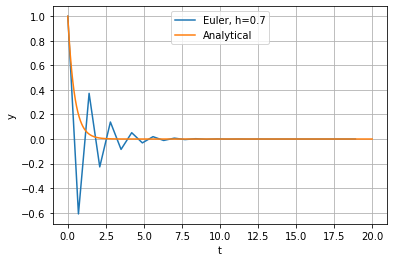

In [47]:
plt.plot(time, y, label='Euler, h={0:.1f}'.format(h))
plt.plot(t_a, y_a, label='Analytical')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.legend(loc='upper center')

Why is forward Euler unstable in some cases?
* Explicitly write the solution: for each time step,
$$ y_{k+1} = y_{k} + h_k \lambda y_k \qquad \text{(here, $\lambda=-2.3$)}$$
* And for $k$ time steps,
$$ y_k = (1+h_k\lambda)^ky_0.$$
* For the method to be stable, the magnitude of growth factor
$$|1 + h_k \lambda|\leq 1 \quad\Rightarrow\quad \lambda < 0,\ h_k \leq |2/\lambda|.$$

We will investigate more of this in the coming labs.

# Summary

* Adaptive RK4: do two RK4 steps, compute error, adjust step size.
    * More operations "per step", but gains can be significant if function varies in concentrated regions.
* MMP: a way to make the error even globally (not trivial).
* Bulirsch-Stoer: use MMP to kill even orders of error, one by one.

* BVPs shooting method: combine ODE integration with root finding
    * eigenvalue problems: it's the eigenvalue, not the initial or boundary value, that we try varying.